# INFORSYS 722 Resubmission of Iteration 3

## Parckage Used
sklearn, pandas, matplotlib,numpy

# STEP 3 - STEP 8

# STEP 3 DATA PREPARATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('loanITERATION3.csv', encoding = "ISO-8859-1", low_memory=False)

## 3.1 Select the Data

In [3]:
col_drop = ['inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il'] 
df = df.drop(col_drop, axis = 1)
col_drop = ['il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'annual_inc_joint']
df = df.drop(col_drop, axis = 1)
col_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog']
df = df.drop(col_drop, axis = 1)
col_drop = ['policy_code', 'initial_list_status', 'zip_code', 'id', 'member_id', 'pymnt_plan','earliest_cr_line']
df = df.drop(col_drop, axis = 1)

In [4]:
df = df[(df['loan_status'] != 'Does not meet the credit policy. Status:Fully Paid') & (df['loan_status'] != 'Does not meet the credit policy. Status:Charged Off')]
# remove observations with loan_status == Current and Issued
df = df[(df['loan_status'] != 'Current') & (df['loan_status'] != 'Issued')]
print('No. of Observations: ', str(len(df)))
print('No. of Attributes: ' + str(len(df.columns)))

No. of Observations:  274390
No. of Attributes: 42


## 3.2 Clean the Data

### Missing values

In [5]:
# fill missing data with the median value (numeric) or the most frequent value (categorical)
for i in df:
    if df[i].isnull().sum() != 0:
        if df[i].dtype != 'object':
            fillmedian = df[i].median()
            df[i].fillna(fillmedian, inplace=True)
            print('{:<30} {:^6}'.format(i,str(fillmedian)))
        else:
            frequency = df[i].value_counts().index[0]
            df[i].fillna(frequency, inplace = True)
            print('{:<30} {:^6}'.format(i,frequency))

emp_length                     10 years
revol_util                      56.1 
last_pymnt_d                   15-Dec
last_credit_pull_d             16-Jan
collections_12_mths_ex_med      0.0  
tot_coll_amt                    0.0  
tot_cur_bal                    78674.0
total_rev_hi_lim               22010.0


## 3.3 Construct & Fomat the Data

In [6]:
# good and bad loan
df['target'] = 0
df.target = np.where(df.loan_status == 'Fully Paid', 1, 0)

In [7]:
df[['loan_status','target']].head()

,loan_status,target
0,Charged Off,0
1,Charged Off,0
2,Charged Off,0
3,Fully Paid,1
4,Fully Paid,1


# STEP 4 DATA TRANSFORMATION

## 4.1 Reduce the Data

In [8]:
col_drop = ['funded_amnt','funded_amnt_inv','total_pymnt_inv','out_prncp_inv']
df = df.drop(col_drop, axis=1)

In [9]:
col_drop = ['pub_rec','tot_coll_amt','collections_12_mths_ex_med','application_type','acc_now_delinq']
df = df.drop(col_drop, axis=1)
# drop loan status, keep target
df = df.drop('loan_status', axis=1)
print('No. of Observations: ', str(len(df)))
print('No. of Attributes: ' + str(len(df.columns)))

No. of Observations:  274390
No. of Attributes: 33


## 4.2 Project the Data

### Rename columns

In [10]:
df.rename(columns={'addr_state':'state'}, inplace=True)
df.rename(columns={'issue_d':'issue_date'}, inplace=True)
df.rename(columns={'dti':'monthly_payment_to_totaldebt'}, inplace=True)
df.rename(columns={'delinq_2yrs':'past_due_2years'}, inplace=True)
df.rename(columns={'inq_last_6mths':'inquery_6month'}, inplace=True)
df.rename(columns={'revol_util':'revol_utilization'}, inplace=True)
df.rename(columns={'open_rv_24m':'revol_amnt_24month'}, inplace=True)
df.rename(columns={'open_rv_12m':'revol_amnt_12month'}, inplace=True)
df.rename(columns={'total_rev_hi_lim':'total_credit_to_lim'}, inplace=True)

In [11]:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_date', 'purpose', 'state', 'monthly_payment_to_totaldebt',
       'past_due_2years', 'inquery_6month', 'open_acc', 'revol_bal',
       'revol_utilization', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'tot_cur_bal', 'total_credit_to_lim', 'target'],
      dtype='object')


### Preprocessing the data

In [12]:
feature_name = df.drop('target', axis = 1).columns
x = df.drop('target', axis = 1)
y = df.target

In [13]:
# Encoding the fields
from sklearn.preprocessing import LabelEncoder
# Encoding the categorical attributes
for i in x:
    if x[i].dtype == 'object':
        labelencoder_x = LabelEncoder()
        x[i] = labelencoder_x.fit_transform(x[i].astype(str))
        print('Label Encoded: ' + i)

Label Encoded: term
Label Encoded: grade
Label Encoded: sub_grade
Label Encoded: emp_length
Label Encoded: home_ownership
Label Encoded: verification_status
Label Encoded: issue_date
Label Encoded: purpose
Label Encoded: state
Label Encoded: last_pymnt_d
Label Encoded: last_credit_pull_d


### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)


In [15]:
x

array([[-1.37134093,  1.80329344,  0.30395848, ..., -1.61822316,
        -0.33093969, -0.21912671],
       [-1.02021825,  1.80329344, -0.27807096, ..., -1.98124841,
        -0.33093969, -0.21912671],
       [-0.57749835, -0.55454092, -0.09759672, ..., -2.88881152,
        -0.33093969, -0.21912671],
       ..., 
       [-1.34386176, -0.55454092,  0.88824386, ...,  0.65068461,
         0.29296402, -0.84282033],
       [ 0.7170757 ,  1.80329344,  0.08738939, ...,  0.65068461,
         0.13197502,  7.89889409],
       [-0.35155854, -0.55454092,  1.19956194, ...,  0.65068461,
        -0.51550215, -0.41958591]])

# STEP 8 DATA MINING

## 7.1 Test Design

In [16]:
# Split training set & test set: 70/30
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [17]:
print('Size of trainings set:', str(len(ytrain)))
print('Size of test set:', str(len(ytest)))

Size of trainings set: 192073
Size of test set: 82317


## 7.2 Conduct Data Mining

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(xtrain, ytrain)
lr_pred = classifier_lr.predict(xtest)


In [19]:
print(classifier_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [20]:
pd.DataFrame([lr_pred, ytest], index=['LR_prediction','Test_target'])

,0,1,2,3,4,5,6,7,8,9,...,82307,82308,82309,82310,82311,82312,82313,82314,82315,82316
LR_prediction,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Test_target,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Decision Tree Classification

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(xtrain, ytrain)
dt_pred = classifier_dt.predict(xtest)


In [22]:
print(classifier_dt.get_params())

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}


In [24]:
pd.DataFrame([dt_pred, ytest], index=['DT_prediction','Test_target'])

,0,1,2,3,4,5,6,7,8,9,...,82307,82308,82309,82310,82311,82312,82313,82314,82315,82316
DT_prediction,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Test_target,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## 7.3 Search for Patterns

In [25]:
df2 = df[['target','loan_amnt','annual_inc','int_rate','last_pymnt_amnt','installment','out_prncp','recoveries','monthly_payment_to_totaldebt']]
df2.corr()


,target,loan_amnt,annual_inc,int_rate,last_pymnt_amnt,installment,out_prncp,recoveries,monthly_payment_to_totaldebt
target,1.000000,-0.082394,0.048564,-0.258191,0.431567,-0.064870,-0.421711,-0.360348,-0.144941
loan_amnt,-0.082394,1.000000,0.325882,0.217270,0.528115,0.954413,0.203843,0.164524,0.053658
annual_inc,0.048564,0.325882,1.000000,-0.026444,0.211735,0.321491,0.045819,0.023140,-0.168640
int_rate,-0.258191,0.217270,-0.026444,1.000000,0.087908,0.207073,0.141159,0.162017,0.178111
last_pymnt_amnt,0.431567,0.528115,0.211735,0.087908,1.000000,0.477378,-0.177537,-0.152475,-0.002580
installment,-0.064870,0.954413,0.321491,0.207073,0.477378,1.000000,0.174811,0.148149,0.052682
out_prncp,-0.421711,0.203843,0.045819,0.141159,-0.177537,0.174811,1.000000,-0.048772,0.093873
recoveries,-0.360348,0.164524,0.023140,0.162017,-0.152475,0.148149,-0.048772,1.000000,0.041370
monthly_payment_to_totaldebt,-0.144941,0.053658,-0.168640,0.178111,-0.002580,0.052682,0.093873,0.041370,1.000000


In [26]:
correlation = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

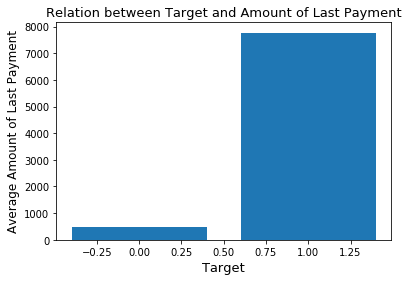

In [27]:
vdf = df.groupby('target')['last_pymnt_amnt'].mean()
vdf = vdf.reset_index()
plt.bar(vdf.target.values, vdf.last_pymnt_amnt.values)
plt.title('Relation between Target and Amount of Last Payment', size = 13)
plt.xlabel('Target', fontsize = 13)
plt.ylabel('Average Amount of Last Payment', fontsize = 12)
plt.show()

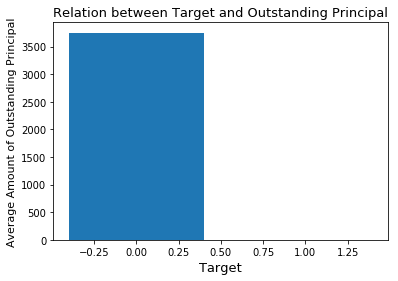

In [28]:
vdf = df.groupby('target')['out_prncp'].mean()
vdf = vdf.reset_index()
plt.bar(vdf.target.values, vdf.out_prncp.values)
plt.title('Relation between Target and Outstanding Principal', size = 13)
plt.xlabel('Target', fontsize = 13)
plt.ylabel('Average Amount of Outstanding Principal', fontsize = 11)
plt.show()

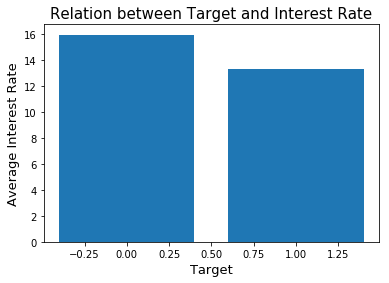

In [29]:
vdf = df.groupby('target')['int_rate'].mean()
vdf = vdf.reset_index()
plt.bar(vdf.target.values, vdf.int_rate.values)
plt.title('Relation between Target and Interest Rate', size = 15)
plt.xlabel('Target', fontsize = 13)
plt.ylabel('Average Interest Rate', fontsize = 13)
plt.show()

# STEP 8 INTERPRETATION

## 8.1 Mined Patterns

### Coefficients: Logistic Model

In [30]:
feature_coef = {}
coef = classifier_lr.coef_[0]
for i in range(len(feature_name)):
    feature_coef[feature_name[i]] = coef[i] 

In [31]:
for k, v in sorted(feature_coef.items(),key=lambda a: a[1], reverse=True):
    print('{:<30} {:^6}'.format(k,v))

last_pymnt_amnt                10.087322696696942
total_rec_prncp                9.555436875414129
total_pymnt                    6.638858359583439
sub_grade                      0.7853796803291628
last_pymnt_d                   0.24913090856528686
revol_bal                      0.09701799365037946
home_ownership                 0.07243749274623101
annual_inc                     0.06049576794007248
open_acc                       0.03373170778161632
emp_length                     0.012540554035632178
revol_utilization              0.011455156528215169
state                          0.009668069492006921
purpose                        0.007293647148381956
verification_status            0.0013648884601497888
past_due_2years                -0.006784064414839832
tot_cur_bal                    -0.00771517974778184
total_acc                      -0.011485407838324344
issue_date                     -0.015175003528884397
inquery_6month                 -0.02879807693847769
total_credit_to_lim    

### Importance: Decision tress classification

In [32]:
importance = classifier_dt.feature_importances_
dt_importance = {}
for i in range(len(importance)):
    dt_importance[feature_name[i]] = importance[i]

In [33]:
for k, v in sorted(dt_importance.items(),key=lambda a: a[1], reverse=True):
    print('{:<30} {:^6}'.format(k,v))

last_pymnt_amnt                0.46250356153192723
total_rec_prncp                0.17588404127450294
loan_amnt                      0.15202508477874058
recoveries                     0.09049987876300988
out_prncp                      0.07338784699374998
issue_date                     0.01399026731807303
installment                    0.010385970965735795
last_credit_pull_d             0.0045431518551443595
total_rec_late_fee             0.0034384305830441196
term                           0.0024644435115765543
total_rec_int                  0.0023225994461808295
last_pymnt_d                   0.0021188408109506
total_credit_to_lim            0.0007072297369385881
sub_grade                      0.0006707019187099145
monthly_payment_to_totaldebt   0.0006629496312446696
annual_inc                     0.0005955213682694921
state                          0.000562465307729135
revol_bal                      0.0005276895674586223
revol_utilization              0.0005179043784457927
tot_cur_ba

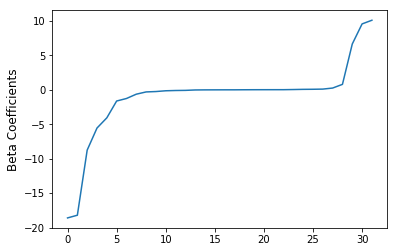

In [34]:
# coefficients plot
beta = list(np.sort(classifier_lr.coef_[0]))
plt.plot(beta)
plt.ylabel('Beta Coefficients', fontsize = 12)
plt.show()

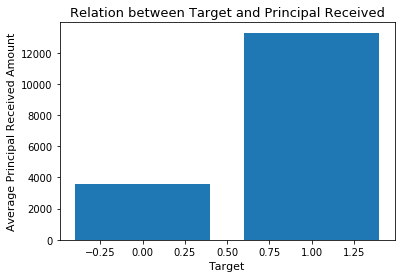

In [35]:
# Principal received to date
vdf = df.groupby('target')['total_rec_prncp'].mean()
vdf = vdf.reset_index()
plt.bar(vdf.target.values, vdf.total_rec_prncp.values)
plt.title('Relation between Target and Principal Received', size = 13)
plt.xlabel('Target', fontsize = 11)
plt.ylabel('Average Principal Received Amount', fontsize = 11)
plt.show()

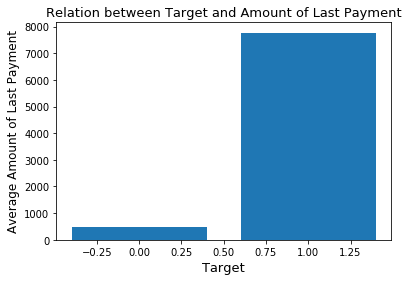

In [36]:
vdf = df.groupby('target')['last_pymnt_amnt'].mean()
vdf = vdf.reset_index()
plt.bar(vdf.target.values, vdf.last_pymnt_amnt.values)
plt.title('Relation between Target and Amount of Last Payment', size = 13)
plt.xlabel('Target', fontsize = 13)
plt.ylabel('Average Amount of Last Payment', fontsize = 12)
plt.show()

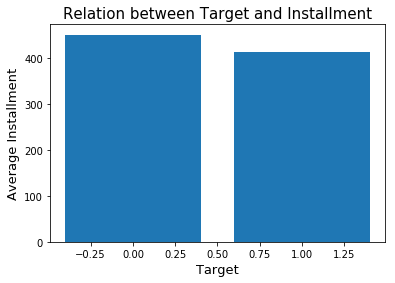

In [37]:
vdf = df.groupby('target')['installment'].mean()
vdf = vdf.reset_index()
plt.bar(vdf.target.values, vdf.installment.values)
plt.title('Relation between Target and Installment', size = 15)
plt.xlabel('Target', fontsize = 13)
plt.ylabel('Average Installment', fontsize = 13)
plt.show()

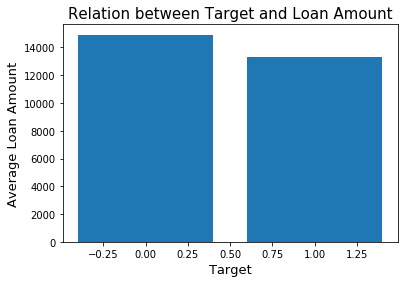

In [38]:
vdf = df.groupby('target')['loan_amnt'].mean()
vdf = vdf.reset_index()
plt.bar(vdf.target.values, vdf.loan_amnt.values)
plt.title('Relation between Target and Loan Amount', size = 15)
plt.xlabel('Target', fontsize = 13)
plt.ylabel('Average Loan Amount', fontsize = 13)
plt.show()

## Assessment, Evaluation and Visualization

In [39]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(ytest, lr_pred)
accuracy_dt = accuracy_score(ytest, dt_pred)

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(ytest,lr_pred)
cm_dt = confusion_matrix(ytest,dt_pred)


In [40]:
print('Confusion Matrix of Logistic Regression')
pd.DataFrame(cm_lr)

Confusion Matrix of Logistic Regression


,0,1
0,19675,374
1,36,62232


In [41]:
print('Confusion Matrix of \nDecision Tree Classification')
pd.DataFrame(cm_dt)

Confusion Matrix of 
Decision Tree Classification


,0,1
0,19913,136
1,137,62131


In [42]:
print('Accuracy of Logistic Regression: '+str(accuracy_lr))
print('Accuracy of Decision Tree Model: '+str(accuracy_dt))

Accuracy of Logistic Regression: 0.995019254832
Accuracy of Decision Tree Model: 0.996683552608


In [43]:
from sklearn.metrics import r2_score
r2_score(ytest, lr_pred) 

0.97296566080283875

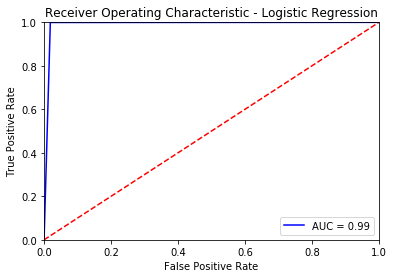

In [44]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(ytest, lr_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

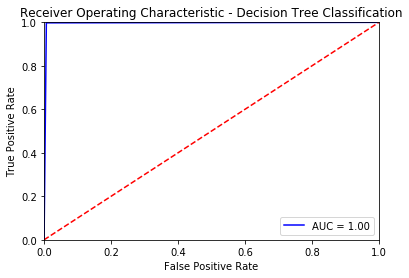

In [45]:
fpr, tpr, threshold = metrics.roc_curve(ytest, dt_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Decision Tree Classification')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, lr_pred))
print(classification_report(ytest, dt_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     20049
          1       0.99      1.00      1.00     62268

avg / total       1.00      1.00      1.00     82317

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     20049
          1       1.00      1.00      1.00     62268

avg / total       1.00      1.00      1.00     82317



## 8.5 Iterations

In [47]:
# Split training set & test set: 80/20
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [48]:
# logistic regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(xtrain, ytrain)
lr_pred = classifier_lr.predict(xtest)

In [49]:
# decision tree classification
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(xtrain, ytrain)
dt_pred = classifier_dt.predict(xtest)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(ytest, lr_pred)
accuracy_dt = accuracy_score(ytest, dt_pred)
print('Accuracy of Logistic Regression: '+str(accuracy_lr))
print('Accuracy of Decision Tree Model: '+str(accuracy_dt))

Accuracy of Logistic Regression: 0.995426218157
Accuracy of Decision Tree Model: 0.996920441707
